In [2]:
from selenium import webdriver
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/hrdata.csv")
df

Here data contains the details of 2014 Major League Baseball score  which is in form of numerical data. Here 'W' is a target variable

# Exploratory Data Analysis (EDA)

In [4]:
#checking rows and columns of data set
df.shape

(30, 17)

The given data set has 30 rows and 17 columns of which 1 is target variable and other 16 are independent variable.

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

There are 2 types of data types present(float 64, int64) in the data.

In [7]:
# to check null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can see there are no null values present in data 

<AxesSubplot:>

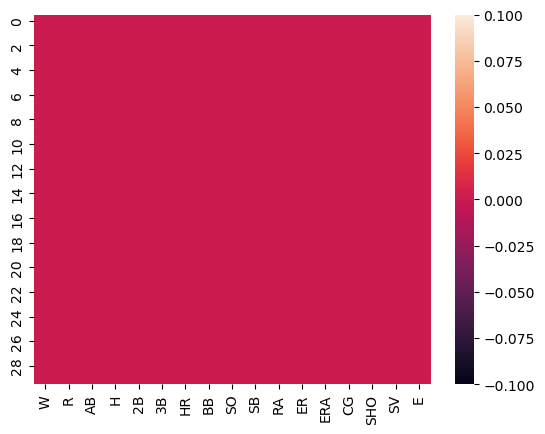

In [8]:
#lets visualise null values using heat map
sns.heatmap(df.isnull())

In [9]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [10]:
# to check number of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


# Describing a data Set

In [11]:
# statistical description of data set
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


The summary of data set look perfect as there is no invalid data.
We can observe following points 
1) There is no missing values as count of all column is equal.
2) Some countries have minimum values as 0
3) There are no negative values

# Data Visualisation

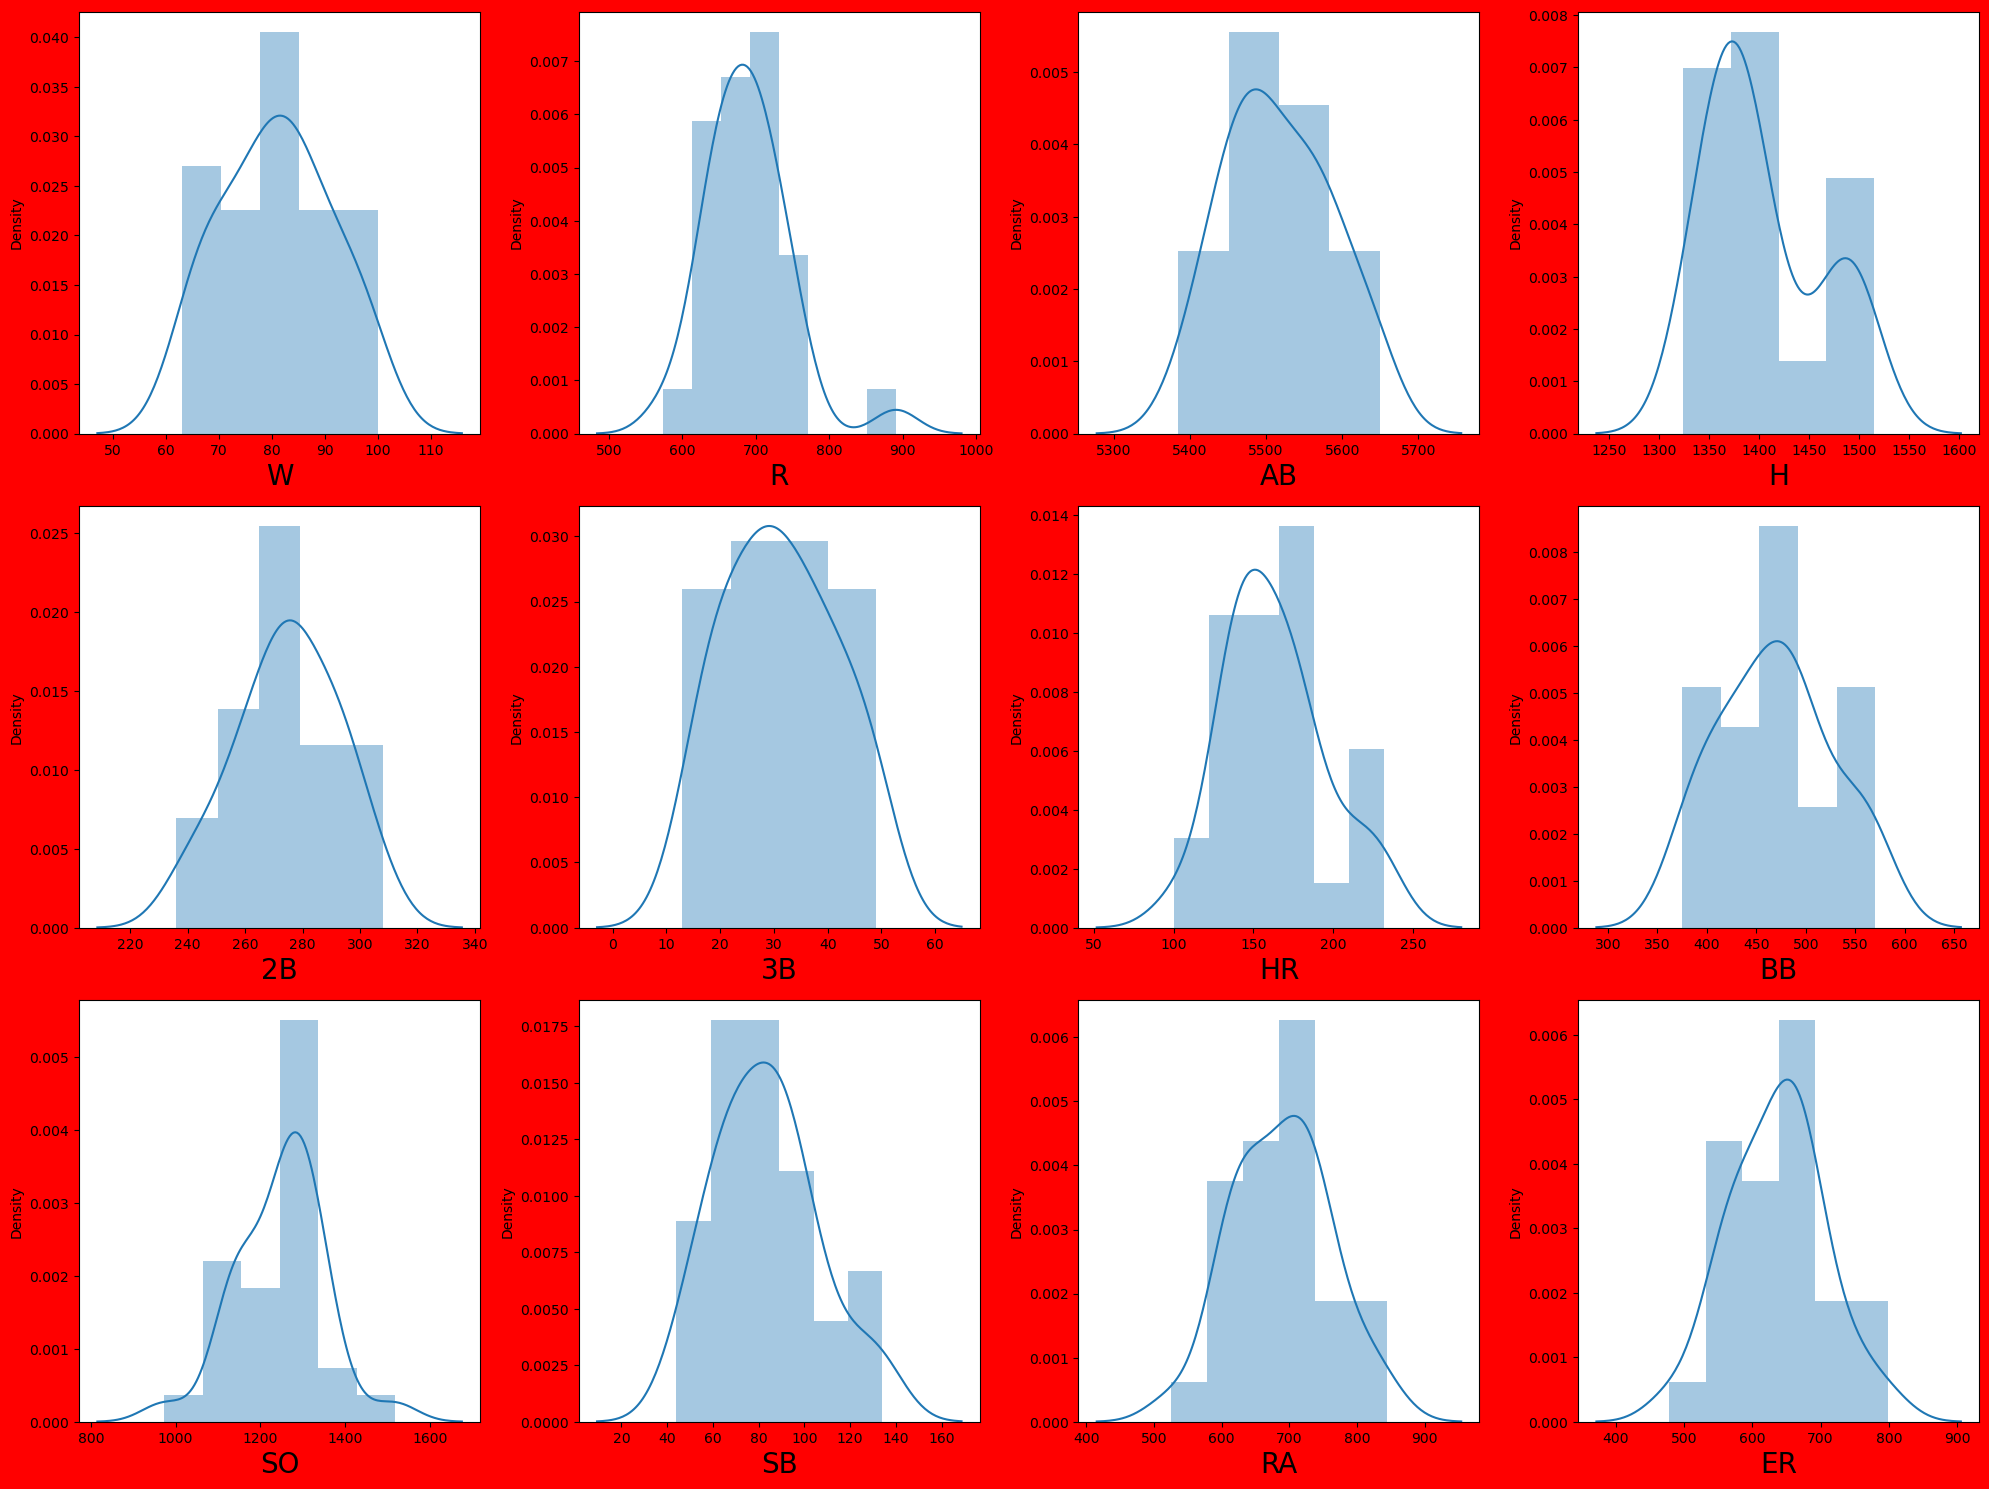

In [12]:
plt.figure(figsize =(20,15), facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

In [13]:
# to check skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

2B, SO have left skewness, whereas we see that others are rightly skewed.  

# USING CORRELATION AND TO FURTHER STUDY RELATIONSHIP

<AxesSubplot:>

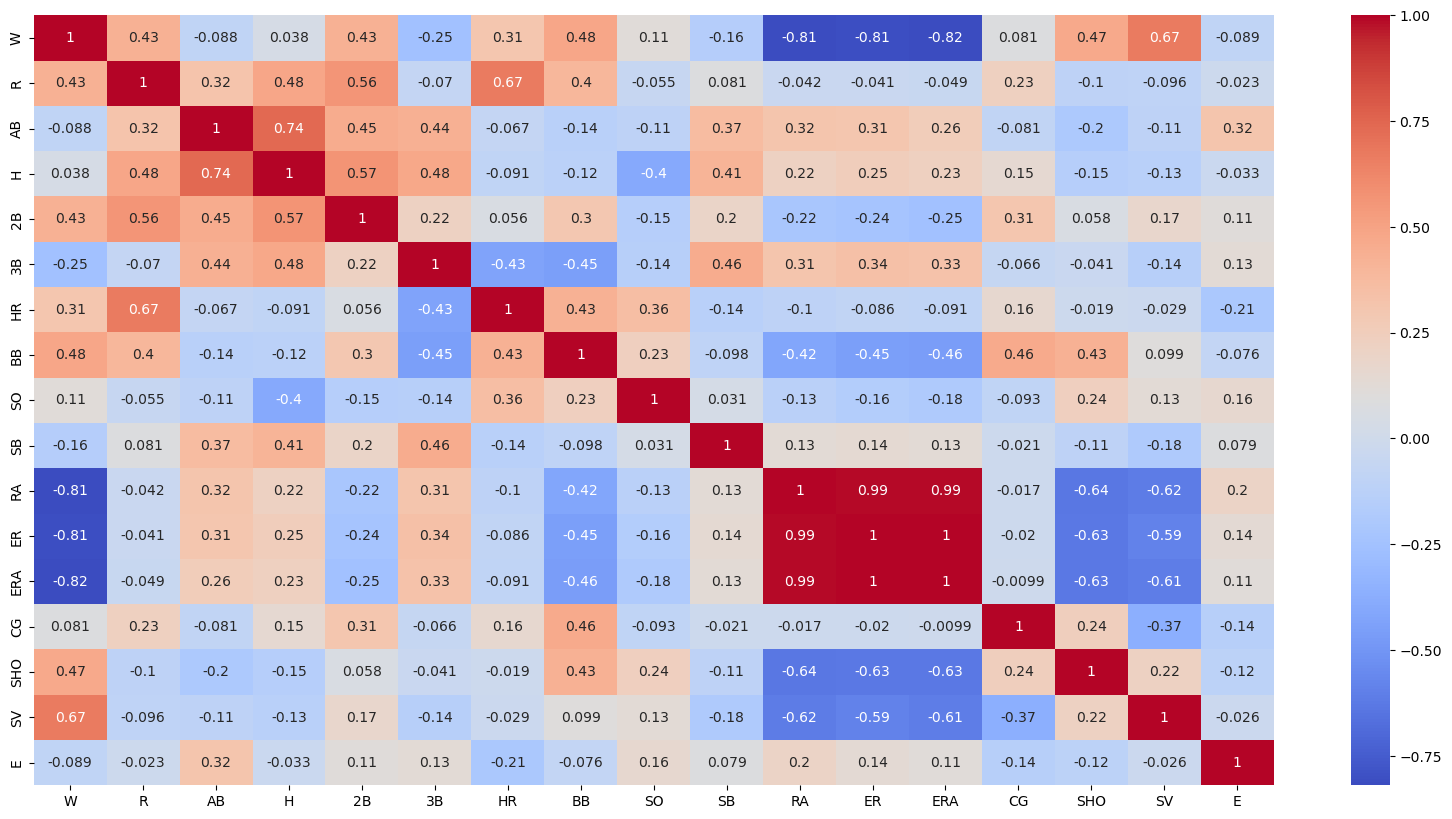

In [14]:
corr_df=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_df,annot= True, cmap='coolwarm')

From above data it is clear that W has negative corelation with ERA, ER and RA.

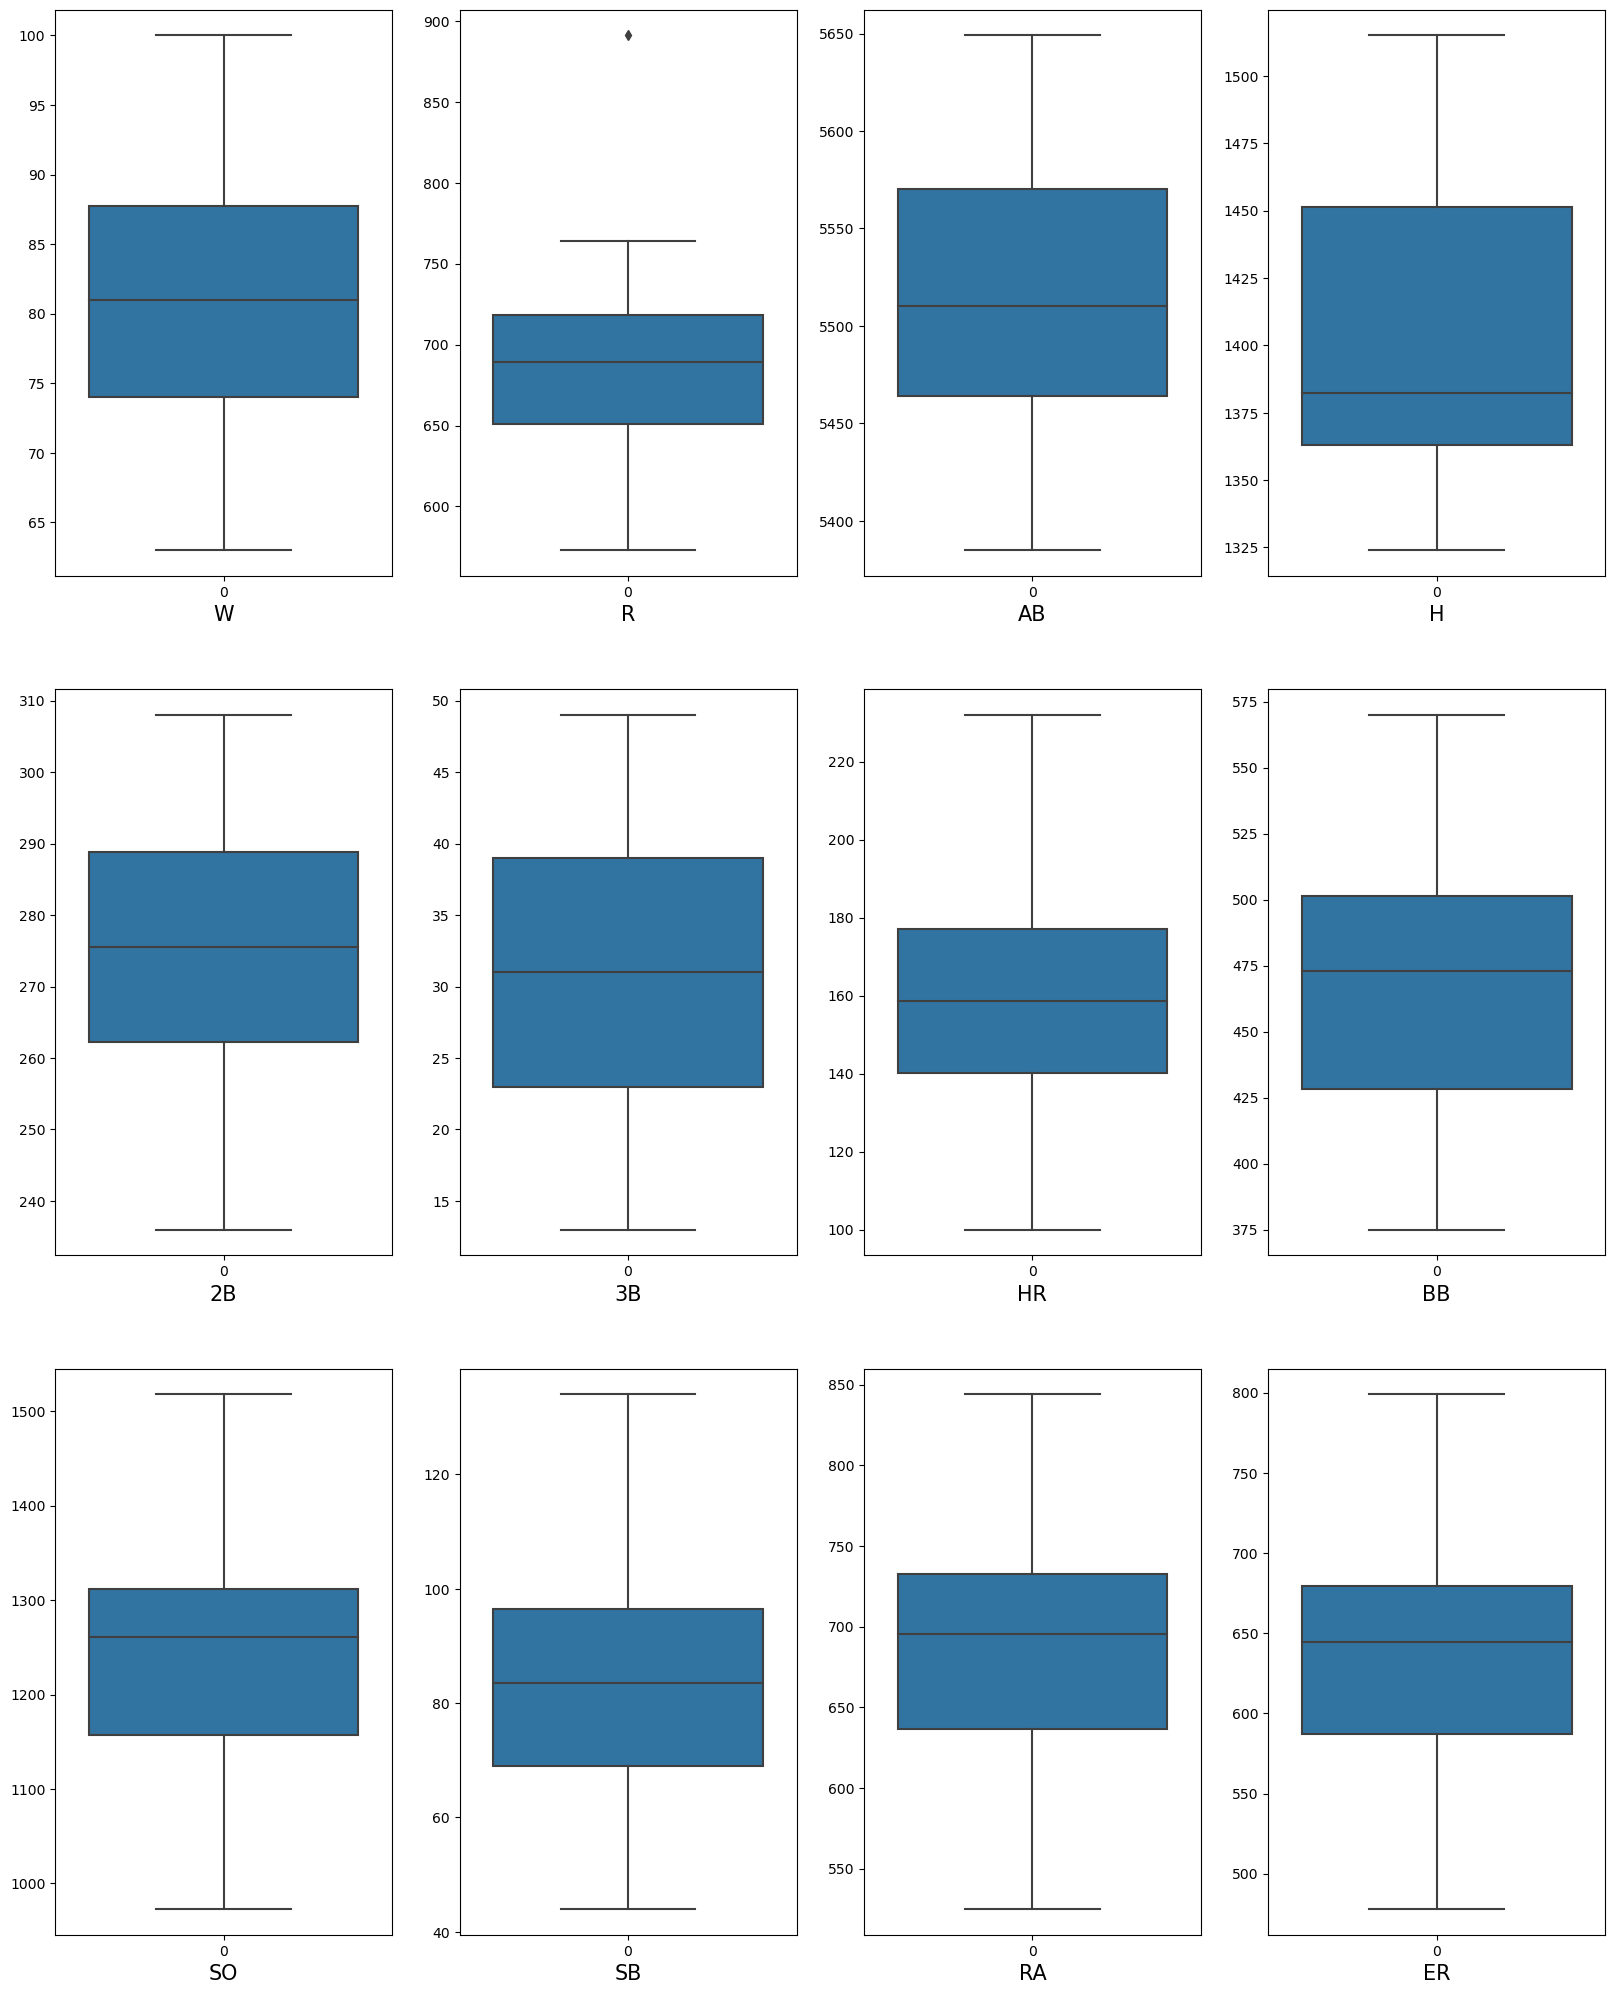

In [15]:
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

we see that overall the data has many ouliers both on higher and lower ends but as we cannot remove any data due to the small number of data.

# seperating target variable and other variables

In [16]:
X=df.drop(columns =['W'])
Y=df['W']

In [17]:
print(X)

      R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.5

In [18]:
print(Y)

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64


# Machine Learning Algorithm

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=140)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (21, 16)
Training target vector size: (21,)
Test feature matrix size: (9, 16)
Test target vector size: (9,)


# Linear Regression 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9062313263733316 on Random_state 29


In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=29)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted result price:\n', y_pred)
print('actual price\n',Y_test)

Predicted result price:
 [103.50300581  83.01980061  71.47948265  59.15053885  82.40462209
  86.80694241  86.58872212  86.92055042  84.13505693]
actual price
 16    98
20    90
18    68
23    67
27    79
3     76
10    88
25    92
13    76
Name: W, dtype: int64


In [57]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 5.849944211378165
Mean squared error : 41.67557964444782
Root Mean Squared Error: 6.455662603052287


 R2 Score :
0.6077478560074049


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [59]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))

    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')



 Error of  RandomForestRegressor() :
Mean absolute error : 4.035555555555557
Mean squared error : 27.78395555555557
Root Mean Squared Error: 5.271048809824812


 R2 Score :
0.738496351382756


 Error of  SVR() :
Mean absolute error : 9.224011134061648
Mean squared error : 106.27421695603644
Root Mean Squared Error: 10.308938692030157


 R2 Score :
-0.0002569804135430509


 Error of  DecisionTreeRegressor() :
Mean absolute error : 10.333333333333334
Mean squared error : 181.22222222222223
Root Mean Squared Error: 13.461880337539114


 R2 Score :
-0.7056704624680457


 Error of  AdaBoostRegressor() :
Mean absolute error : 5.342901234567901
Mean squared error : 35.24378686556926
Root Mean Squared Error: 5.936647780150786


 R2 Score :
0.6682841347767707




From the above we can see that Linear Regression is the best model as it has maximum R2 score.